#Crop Yield Estimation  

**Dataset:** [Kaggle](https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield) – Agriculture Crop Yield  

**Group Members:**  
- Angelica Moreno   
- Arunima Sen  
- Ethel Ogallo







## **Introduction**  
This section introduces the data i.e

* how and why was the data collected? what is the application domain?  
* what is the learning task you will study?  
* what are the features (meaning, types and categories if it applies)?  
* what is the output variable (meaning, type and categories if it applies)?  



The table belows shows the raw dataset

In [1]:
import pandas as pd

# Read the csv
data = pd.read_csv("./crop_yield.csv")
data

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159




**How and why was the data collected? what is the application domain?**  
This dataset contains synthetically generated agricultural samples created for the purpose of practicing machine learning models, specifically for predicting crop yield. Although it is not collected from real-world field measurements or agricultural study, the data is based on commonly understood agricultural factors that influence crop yield.  

**What is the learning task you will study?**   
The learning task for this dataset is *supervised regression*.

**Dataset Features**

In [2]:
# inspect data columns and type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
None


In [3]:
# filter out categorical columns
categorical_data = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']

# print the unique categories of each column
for col in categorical_data:
    print(f"{col}: {data[col].unique()}\n")

Region: ['West' 'South' 'North' 'East']

Soil_Type: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']

Crop: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']

Fertilizer_Used: [False  True]

Irrigation_Used: [ True False]

Weather_Condition: ['Cloudy' 'Rainy' 'Sunny']





**Categorical variables:**  
*   Region - The geographical region where the crop is grown (West, South, North, East).
*   Soil Type - The type of soil (Sandy,Clay,Loam,Silt,Peaty,Chalky) .
*   Crop - The type of crop grown (Cotton, Rice,Barley,Soybean, Wheat, Maize).
*   Weather Condition - The predominant weather condition (Cloudy,Rainy,Sunny).
*   Fertilizer_Used - Indicates whether fertilizer was applied (False,True).
*   Irrigation_Used - Indicates whether irrigation was used (True, False ).

**Numerical variables:**

*   Rainfall_mm - Rainfall during the crop growth period in mm
*   Temperature_Celsius - Average temperature during the crop growth period in celsius
*   Days_to_Harvest - The number of days taken for the crop to be harvested after planting



**Output variable**    
- Yield_tons_per_hectare - A numerical continuous variable that is the total crop yield produced, measured in tons per hectare.

## **Exploratory Data Analysis**
This section describes the dataset using figures and descriptive statistics

The table below gives an overview of the summary statistics (average, min, max, std etc) of the numerical features: `Rainfall_mm`,`Temperature_Celsius`, `Days_to_Harvest` and `Yield_tons_per_hectare`

In [4]:
# descriptive statistical analysis for numerical data
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


The table below gives a descriptive statitsical summary of the categorical features: `Region`,`Soil_Type`,`Crop`,`Fertilizer_used`,`Irrigation_Used`,`Weather_Condition`

In [5]:
# descriptive stats for categorical data
data.describe(include=['object','bool'])

,Region,Soil_Type,Crop,Fertilizer_Used,Irrigation_Used,Weather_Condition
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,4,6,6,2,2,3
top,North,Sandy,Maize,False,False,Sunny
freq,250173,167119,166824,500060,500509,333790


**comment:**  
Based on the summary statistics above , we can observe that there are no null or missing values in the numerical features. We can see in the target variable `Yield_tons_per_hectare` there are negative values that need to be investigated further.

### **Figures describing features**  
Visualizations showing the relationship and the distribution of the features in the dataset.  

The figure below shows the distribution of crop yield across all the observations.

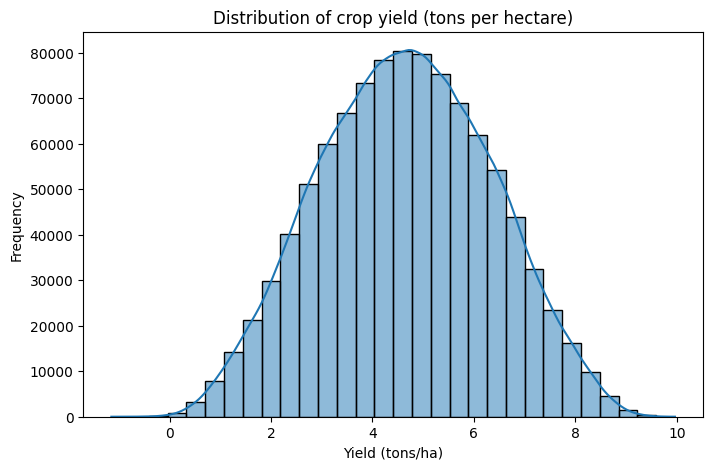

In [6]:
# Distribution of crop yield variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Yield_tons_per_hectare'], kde=True, bins=30)
plt.title("Distribution of crop yield (tons per hectare)")
plt.xlabel("Yield (tons/ha)")
plt.ylabel("Frequency")
plt.show()

**comment**  
The distribution is continuous and approximately normal (bell-shaped), with majority of the data around the mean. We also observe slight deviations such as a small tail below zero which should be impossible for yield but may be data noise or error.

The figure below shows a pairwise correlation matrix that shows the relationship between all the numerical features.

<Axes: >

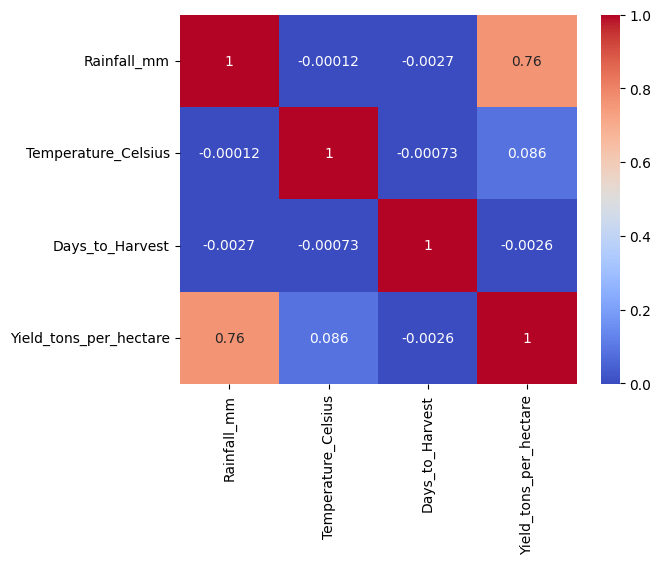

In [7]:
# visualizations of the relationships of the numerical features
numeric_data = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Yield_tons_per_hectare"]
sns.heatmap(data[numeric_data].corr(), annot=True, cmap="coolwarm")

**comment:**  
There is a strong positive correlation of 0.76. This suggests that higher rainfall tends to be associated with a higher yield. Temperature and days to harvest have a weaker correlation to yield.

The figure below shows a boxplot showing the distribution of crop yield per crop type.

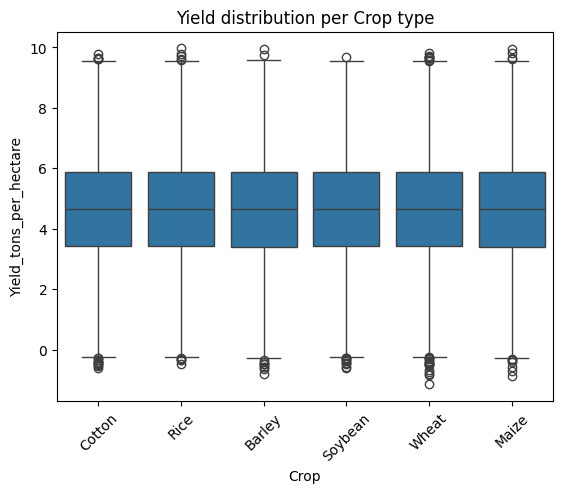

In [8]:
# distribution of yield per crop type
sns.boxplot(data, x='Crop', y='Yield_tons_per_hectare')
plt.xticks(rotation=45)
plt.title("Yield distribution per Crop type")
plt.show()


**comment**  
This distribution is balanced per category however there are outliers in each of the crop type. There are several negative observations and given that crop yield cannot be negative this should be investigated and dealt with.

The figure below shows the distribution of crop yield per region

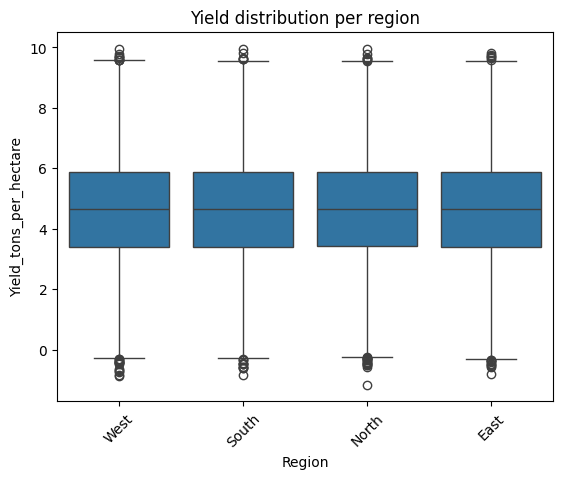

In [9]:
# distribution of yield per region
sns.boxplot(data, x='Region', y='Yield_tons_per_hectare')
plt.xticks(rotation=45)
plt.title("Yield distribution per region")
plt.show()

The distribution per region is also balanced and the negative outliers are also observed in this conntext.

### **Preprocessing**






**Managing outliers or missing values**  
We note that this data does not have missing values from the statistics. It however has some outliers in the `yield_tons_per_hectare` variable as seen from the box plot previously.

In [10]:
# missing values
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

**comment:**  
As earlier observed the data does not have missing values in any of the features

The table below shows the observations with a negative yield value

In [11]:
# number of negatives in yield_tons_per_hectare
data[data['Yield_tons_per_hectare'] < 0]

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
756,East,Peaty,Cotton,101.019421,33.804131,False,False,Rainy,117,-0.007103
7799,South,Chalky,Rice,108.804894,18.004082,False,False,Sunny,86,-0.061283
8421,East,Chalky,Soybean,168.120735,38.473430,False,False,Cloudy,111,-0.119911
9553,North,Silt,Wheat,156.607973,16.610257,False,False,Sunny,129,-0.193093
15435,South,Chalky,Maize,177.481344,27.719742,False,False,Sunny,94,-0.009811
...,...,...,...,...,...,...,...,...,...,...
975666,South,Clay,Barley,116.114046,16.257818,False,False,Sunny,70,-0.471038
982738,West,Loam,Wheat,235.792353,31.699429,False,False,Sunny,68,-0.255772
987054,West,Peaty,Barley,100.467398,15.735951,False,False,Rainy,96,-0.120282
995837,East,Chalky,Maize,105.575189,15.864764,False,False,Rainy,111,-0.051633


**comment:**  
The negative yield are 231 observations which is about 0.02% of the data given the 1,000,000 data points in the full dataset

To address the negative outliers we deleted them as they could be erroneous data within the data points. Crop yield cannot be negative unless comparing different years' production which is not the case in this context

In [12]:
# delete the ouliers (231 data points)
data2 = data[data['Yield_tons_per_hectare'] >= 0]


**comment:**  
We only deleted the negative values of crop yield , we also have some *outliers* on the positive end however these could be reralistic i.e. high yield due to optimal conditions such as high precipitation or best soil type etc

**Normalizing numeric features**   
We standardize all numerical features (Rainfall_mm, Temperature_Celsius, and Days_to_Harvest) because the features are measured on different scales and units (e.g., rainfall in mm vs. temperature in degrees Celsius).
This will ensure that features such as rainfall that have a larger numerical range do not overshadow the others in the model training.  

However before we standardize we split the data into training and test sets and further inorder to avoid data leakage, the scaler will be fitted  only on the training data and then applied to transform both the training and test sets in the model training pipeline

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# drop the target variable
data3 = data2.drop('Yield_tons_per_hectare', axis=1)
target = data2['Yield_tons_per_hectare']

# split the data
X_train, X_test, Y_train, Y_test = train_test_split(data3, target, test_size=0.2, random_state=42, shuffle=True)

# numeric data
numeric_data = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

# Scale numeric features (for linear models)
scaler = StandardScaler()

# make copies of the data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# fit and transform the training data
X_train_scaled[numeric_data] = scaler.fit_transform(X_train[numeric_data])

# transform the test data
X_test_scaled[numeric_data] = scaler.transform(X_test[numeric_data])

print("---Training data before scaling:---\n", X_train.describe())
print("\n---Training data after scaling:---\n",  X_train_scaled.describe())

---Training data before scaling:---
          Rainfall_mm  Temperature_Celsius  Days_to_Harvest
count  799815.000000        799815.000000    799815.000000
mean      550.064908            27.507143       104.508378
std       259.816045             7.219427        25.953553
min       100.000896            15.000034        60.000000
25%       325.016575            21.260131        82.000000
50%       550.188354            27.509700       105.000000
75%       774.824959            33.752779       127.000000
max       999.998098            39.999974       149.000000

---Training data after scaling:---
         Rainfall_mm  Temperature_Celsius  Days_to_Harvest
count  7.998150e+05         7.998150e+05     7.998150e+05
mean  -8.414772e-16        -2.626152e-15     1.167692e-16
std    1.000001e+00         1.000001e+00     1.000001e+00
min   -1.732242e+00        -1.732425e+00    -1.714925e+00
25%   -8.661839e-01        -8.653063e-01    -8.672567e-01
50%    4.751289e-04         3.542213e-04     1.

**comment:**  
We can observe that the scaling  is necessary linear models given the varying scales for our numerical data. The values are now all centered around 0.

**Encoding the categorical data**  
We will encode the categorical features to enable the models to interpret them, as most algorithms require numerical input.

* Nominal Features (`Region`, `Soil_Type`, `Crop`, and `Weather_Condition`): We will use One-Hot Encoding  because these categories are not ordered.
* Binary Features (`Fertilizer_used` and `Irrigation_Used`): Since these features are simple True/False, we will use a binary mapping (True=1, False=0)

This encoding process will also be fitted only on the training set and then applied to transform both the training and test sets within the modeling pipeline to maintain data integrity and prevent leakage.

In [14]:
from sklearn.preprocessing import OneHotEncoder

# defining the categorical features
nominal_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
binary_features = ['Fertilizer_Used', 'Irrigation_Used']

# make copies of the dataset
X_train_encoded = X_train_scaled.copy()
X_test_encoded = X_test_scaled.copy()

# manually encode binary features (1 = true and 0=false);
for col in binary_features:
    X_train_encoded[col] = X_train_encoded[col].map({True: 1, False: 0})
    X_test_encoded[col] = X_test_encoded[col].map({True: 1, False: 0})

# Encode nominal features using One-Hot Encoder
## Initialize encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

## Fit and train encoder on training set
train_encoded = encoder.fit_transform(X_train_encoded[nominal_features])
train_encoder = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(nominal_features),
                         index=X_train_encoded.index) # index preserves row labels
## Transform test set
test_encoder = pd.DataFrame(encoder.transform(X_test_encoded[nominal_features]),
                        columns=encoder.get_feature_names_out(nominal_features),
                        index=X_test_encoded.index)

## Drop original nominal columns and concatenate the encoded ones
X_train_final = pd.concat([X_train_encoded.drop(nominal_features, axis=1), train_encoder], axis=1)
X_test_final = pd.concat([X_test_encoded.drop(nominal_features, axis=1), test_encoder], axis=1)


In [15]:
print("---Training data before encoding:---\n", 'shape:' ,X_train.shape ,'\n',X_train[nominal_features + binary_features].head())
print("\n---Training data after encoding:---\n", 'shape:', X_train_final.shape,'\n', X_train_final.head())

---Training data before encoding:---
 shape: (799815, 9) 
        Region Soil_Type     Crop Weather_Condition  Fertilizer_Used  \
816419   West      Clay  Soybean            Cloudy             True   
180578  North     Sandy   Barley             Sunny             True   
766106  North     Peaty   Cotton            Cloudy             True   
207834  North    Chalky    Wheat             Rainy            False   
411634  North      Loam  Soybean            Cloudy             True   

        Irrigation_Used  
816419            False  
180578            False  
766106             True  
207834            False  
411634             True  

---Training data after encoding:---
 shape: (799815, 24) 
         Rainfall_mm  Temperature_Celsius  Fertilizer_Used  Irrigation_Used  \
816419     1.097792             1.721608                1                0   
180578     1.222346             1.055298                1                0   
766106    -1.079415            -1.067394                1       

**comment:**  
Encoding the categorical data increases the dimension of the data from 9 to 24

## **Evaluation protocol**

### **Data split strategy**

[1] Hold out test set - 80% train and 20% test   

**Justification:** given the 1mil data points, 20% test is still enough data to evaluate generalization.

Also, **shuffle** before splitting because if we don't, the test set might accidentally contain only certain regions/crops and that would bias the evaluation.  


[2] Nested cross-validation on the training set
to tune hyperparameters and evaluate models robustly, we will use nested cross-validation combined with GroupKFold, grouping by `Region`.

Outer loop (GroupKFold): will be used for model assessment, ensuring that samples from the same region never appear in both training and validation folds. This provides an unbiased estimate of model performance on unseen regions.

Inner loop (GroupKFold): will be used for hyperparameter tuning through grid or randomized search, keeping hyperparameter optimization separated from model evaluation.

**Justification:** Crop yields within the same region may share similarities. GroupKFold prevents data leakage between regions and ensures the model is evaluated fairly. Nested CV prevents the validation data from influencing hyperparameter selection and this will give a fair estimate of generalization performance.


[3] Final model training - train the best model with tuned hyperparameters on the full training set (80%) and evaluate once on the held-out test set (20%).

**Justification:** avoids data leakage in that the test set remains completely unseen until the very end.

### **Metrics to be used**  
In this study, we will evaluate the performance of our crop yield estimation model using two commonly used regression metrics: Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

**RMSE** provides an indication of the model’s prediction error in the same units as the target variable and is particularly sensitive to large errors.

**MAE**, on the other hand, measures the average magnitude of the errors regardless of their direction and is less influenced by outliers.